### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №20

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.

3.	Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.

4.	Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

6.	Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

7. 	Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

8. 	Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

9. 	Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 

### Индивидуальный вариант:

Yeast Data Set 

Название файла: yeast.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Yeast 

Класс: localization site (столбец No 10) 

Метод обработки пропущенных значений – среднее значение класса 

Метод нормализации признаков – стандартизация 

Алгоритм снижения размерности данных – метод главных компонент (PCA) 

Дополнительные базовые классификаторы: 

- наивный байесовский классификатор 

- классификатор ближайших соседей (к-во соседей = 3) 

Комбинированный классификатор: StackingClassifier 

Ансамблевые классификаторы: BaggingClassifier, AdaBoostClassifier 

Показатель качества модели – доля верных ответов (accuracy) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"

df = pd.read_csv(url, sep='\s+', header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.

In [3]:
df.dtypes
# в датасете есть 2 категориальных столбца, преобразуем их в числовые

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9     object
dtype: object

In [4]:
df[0] = df[0].astype('category')
df[0] = df[0].cat.codes
df.head()

,0,1,2,3,4,5,6,7,8,9
0,32,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,33,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,34,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [5]:
df[9] = df[9].astype('category')
df[9] = df[9].cat.codes
df.head()

,0,1,2,3,4,5,6,7,8,9
0,32,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,33,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,34,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [6]:
df.isnull().sum(axis=0)
# пустые значения отсутствуют во всем наборе данных

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [7]:
df.groupby(9).count()
# класс 1 содержит очень мало данных, объеденим его с классом 2

,0,1,2,3,4,5,6,7,8
9,,,,,,,,,
0,463,463,463,463,463,463,463,463,463
1,5,5,5,5,5,5,5,5,5
2,35,35,35,35,35,35,35,35,35
3,44,44,44,44,44,44,44,44,44
4,51,51,51,51,51,51,51,51,51
5,163,163,163,163,163,163,163,163,163
6,244,244,244,244,244,244,244,244,244
7,429,429,429,429,429,429,429,429,429
8,20,20,20,20,20,20,20,20,20


In [8]:
df[df[[9]] == 1] = 2
df.groupby(9).count()

,0,1,2,3,4,5,6,7,8
9,,,,,,,,,
0,463,463,463,463,463,463,463,463,463
2,40,40,40,40,40,40,40,40,40
3,44,44,44,44,44,44,44,44,44
4,51,51,51,51,51,51,51,51,51
5,163,163,163,163,163,163,163,163,163
6,244,244,244,244,244,244,244,244,244
7,429,429,429,429,429,429,429,429,429
8,20,20,20,20,20,20,20,20,20
9,30,30,30,30,30,30,30,30,30


3.	Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.

In [9]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=5)

X = pca.fit_transform(df.drop(9, axis=1)) # оставим в датафрейме только признаки
y = df[9]

X # новые признаки уже распределены по важности

array([[ 6.99763474e+02,  8.11579577e-02, -1.84204134e-01,
        -3.55669113e-02,  1.73284764e-02],
       [ 6.98763479e+02,  5.67498322e-02, -3.66735526e-02,
        -1.84087407e-02,  1.45280900e-01],
       [ 6.97763475e+02,  1.34599074e-01, -1.81462912e-01,
        -3.05024979e-02, -1.99560278e-02],
       ...,
       [-7.28236524e+02,  1.74641885e-01, -1.28262210e-01,
        -3.52233866e-02,  2.81989270e-02],
       [-7.29236527e+02, -1.60762840e-01, -2.49438018e-02,
         6.62597598e-02, -9.11885681e-02],
       [ 3.76763475e+02,  8.45595009e-02, -1.68140054e-01,
        -5.37537286e-02, -9.61508775e-02]])

4.	Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

In [10]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_st = standardScaler.transform(X)
X_st = pd.DataFrame(X_st)
X_st

,0,1,2,3,4
0,1.666383,0.474055,-1.387498,-0.337206,0.195644
1,1.664002,0.331484,-0.276240,-0.174531,1.640271
2,1.661620,0.786212,-1.366850,-0.289191,-0.225310
3,1.737823,-0.191913,-1.025624,-0.598790,-1.362028
4,1.733061,-0.003647,2.036250,-0.261392,0.715317
...,...,...,...,...,...
1479,-1.729425,1.675990,-1.306093,-0.400233,-0.888477
1480,-1.731806,-0.282296,1.423480,1.514293,-1.138325
1481,-1.734187,1.020108,-0.966121,-0.333949,0.318376
1482,-1.736569,-0.939038,-0.187887,0.628201,-1.029550


5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

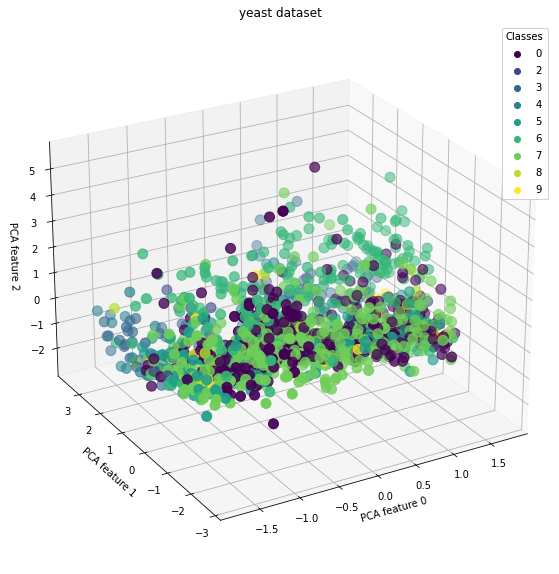

In [11]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = X_st[0]
ys = X_st[1]
zs = X_st[2]
scatter = ax.scatter( xs, ys, zs, c=y,s=100 )
ax.set_xlabel('PCA feature 0')
ax.set_ylabel('PCA feature 1')
ax.set_zlabel('PCA feature 2')
ax.set_title('yeast dataset')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

ax.view_init(azim=-120, elev=25)

6.	Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5, criterion="gini")  
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
from sklearn.metrics import accuracy_score

y_pred = dt_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5521885521885522

In [15]:
def plot_decision_boundary(model, X, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    x2 = np.full(len(x0.ravel()), X[2].mean())
    x3 = np.full(len(x0.ravel()), X[3].mean())
    x4 = np.full(len(x0.ravel()), X[4].mean())
    
    X_new = np.c_[x0.ravel(), x1.ravel(), x2, x3, x4]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9','#90CAFF','#F984EF','#CCCCFF',
                                  '#7DC4FA','#99F0EE','#98FADD','#E6F08B'])
    plt.figure(figsize=(10, 7))
    plt.xlabel('PCA feature 0')
    plt.ylabel('PCA feature 1')
    plt.title('yeast dataset')
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

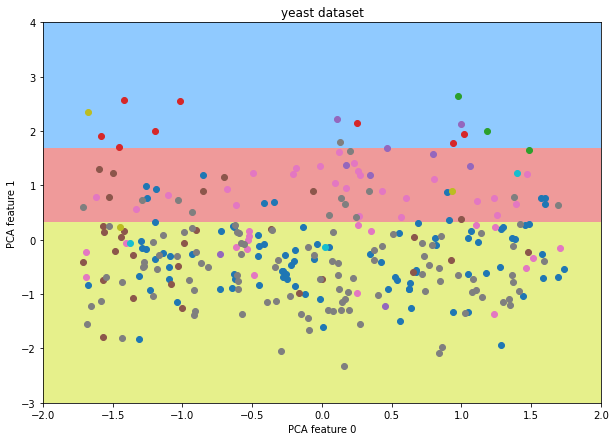

In [16]:
plot_decision_boundary(dt_clf, X_st, axis=[-2, 2, -3, 4])
plt.scatter(X_test[y_test==0][0], X_test[y_test==0][1])
plt.scatter(X_test[y_test==1][0], X_test[y_test==1][1])
plt.scatter(X_test[y_test==2][0], X_test[y_test==2][1])
plt.scatter(X_test[y_test==3][0], X_test[y_test==3][1])
plt.scatter(X_test[y_test==4][0], X_test[y_test==4][1])
plt.scatter(X_test[y_test==5][0], X_test[y_test==5][1])
plt.scatter(X_test[y_test==6][0], X_test[y_test==6][1])
plt.scatter(X_test[y_test==7][0], X_test[y_test==7][1])
plt.scatter(X_test[y_test==8][0], X_test[y_test==8][1])
plt.scatter(X_test[y_test==9][0], X_test[y_test==9][1])
plt.show()

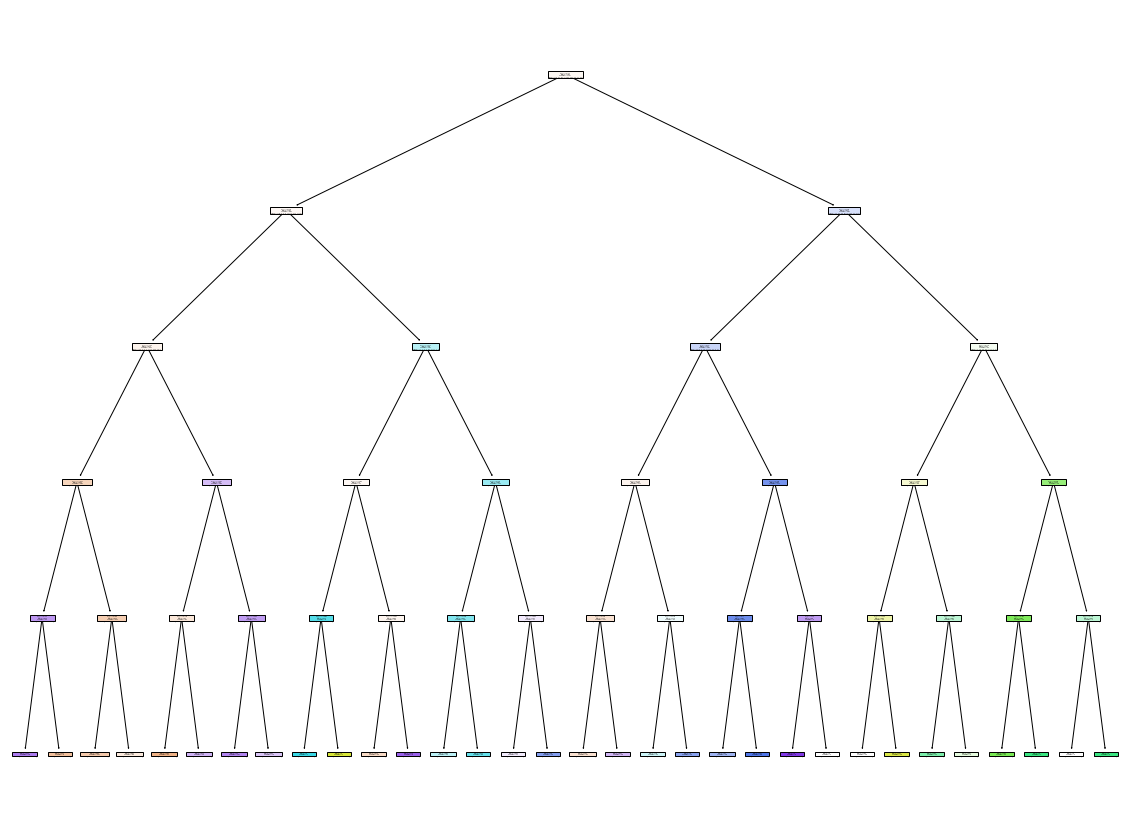

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt_clf,filled=True);

7. 	Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

In [18]:
# наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)
y_pred_nbc = nbc.predict(X_test)
accuracy_score(y_test, y_pred_nbc)

0.5454545454545454

In [19]:
# классификатор ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

kNN_clf = KNeighborsClassifier(n_neighbors=3)
kNN_clf.fit(X_train, y_train)
y_pred_kNN = kNN_clf.predict(X_test)
accuracy_score(y_test, y_pred_kNN)

0.4983164983164983

In [20]:
# StackingClassifier
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[
    ('nbc', GaussianNB()), 
    ('kNN_clf', KNeighborsClassifier(n_neighbors=3)),
    ('dt_clf', DecisionTreeClassifier(random_state=666))])

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
accuracy_score(y_test, y_pred_stack)

0.5521885521885522

8. 	Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

In [21]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=50, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)
accuracy_score(y_test, y_pred_bag)

0.5218855218855218

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)
# BaggingClassifier оказался лучше

0.3164983164983165

9. 	Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок.

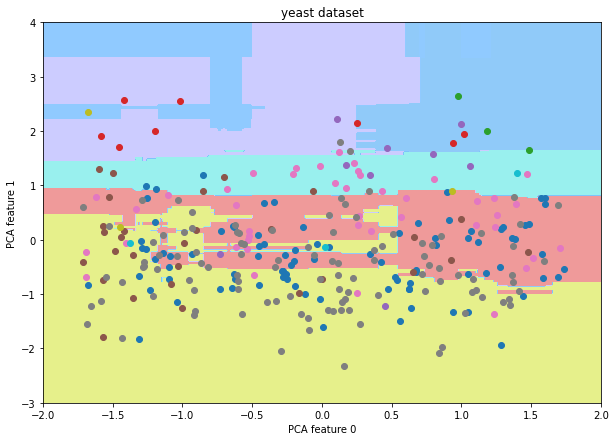

In [23]:
plot_decision_boundary(bagging_clf, X_st, axis=[-2, 2, -3, 4])
plt.scatter(X_test[y_test==0][0], X_test[y_test==0][1])
plt.scatter(X_test[y_test==1][0], X_test[y_test==1][1])
plt.scatter(X_test[y_test==2][0], X_test[y_test==2][1])
plt.scatter(X_test[y_test==3][0], X_test[y_test==3][1])
plt.scatter(X_test[y_test==4][0], X_test[y_test==4][1])
plt.scatter(X_test[y_test==5][0], X_test[y_test==5][1])
plt.scatter(X_test[y_test==6][0], X_test[y_test==6][1])
plt.scatter(X_test[y_test==7][0], X_test[y_test==7][1])
plt.scatter(X_test[y_test==8][0], X_test[y_test==8][1])
plt.scatter(X_test[y_test==9][0], X_test[y_test==9][1])
plt.show()

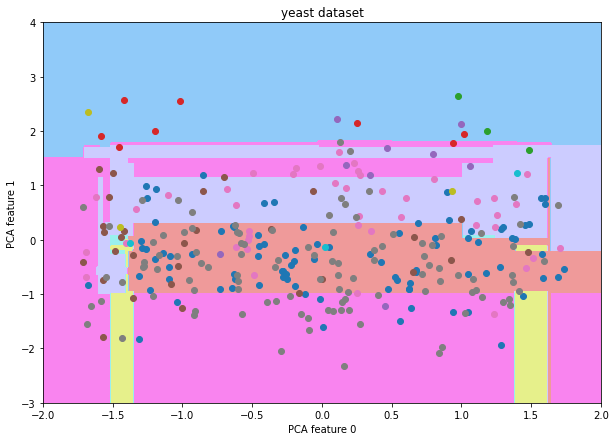

In [24]:
plot_decision_boundary(ada_clf, X_st, axis=[-2, 2, -3, 4])
plt.scatter(X_test[y_test==0][0], X_test[y_test==0][1])
plt.scatter(X_test[y_test==1][0], X_test[y_test==1][1])
plt.scatter(X_test[y_test==2][0], X_test[y_test==2][1])
plt.scatter(X_test[y_test==3][0], X_test[y_test==3][1])
plt.scatter(X_test[y_test==4][0], X_test[y_test==4][1])
plt.scatter(X_test[y_test==5][0], X_test[y_test==5][1])
plt.scatter(X_test[y_test==6][0], X_test[y_test==6][1])
plt.scatter(X_test[y_test==7][0], X_test[y_test==7][1])
plt.scatter(X_test[y_test==8][0], X_test[y_test==8][1])
plt.scatter(X_test[y_test==9][0], X_test[y_test==9][1])
plt.show()